In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/wine-white/winequality-white.csv
/kaggle/input/white-wine/WineQuality-WhiteWine.csv
/kaggle/input/wine-quality-dataset/WineQT.csv
/kaggle/input/white-wine-quality/winequality.names
/kaggle/input/white-wine-quality/winequality-white.csv
/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv
/kaggle/input/wine-red/winequality-red.csv


We will work with the Wine Quality Data Set from UCI. In this machine learning problem, we will see if we can predict wine quality based on its features and predict red or white wine type based on correlated factors of both datasets. 


In [2]:
df_red = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let us check and see how our column values will look when we will need them in the linear regression model.

In [3]:
df_red.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

After realizing the label of these column values, we will need to change them to make them more conducive to our project ease.

In [4]:
df_red.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                        'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide',
                        'total sulfur dioxide':'total_sulfur_dioxide' },inplace=True)


Let us confirm the change has been made in the dataset by printing our new column names below.

In [5]:
df_red.columns.values

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

We have successfully changed the column names and will run the same procedure with the white wine column names. 

In [6]:
df_white = pd.read_csv('/kaggle/input/white-wine/WineQuality-WhiteWine.csv')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df_white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                        'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide',
                        'total sulfur dioxide':'total_sulfur_dioxide' },inplace=True)

df_white.columns.values

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

Next, we want to start to see if we have any correlations within the dataset wine type and those that can be used to compare both. We can use this information to help us predict what type of wine you like based on another one chosen. The target variable we will start with is quality. 

In [8]:
corr_red = df_red.corr()['quality'].drop('quality')
print(corr_red)

fixed_acidity           0.124052
volatile_acidity       -0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides              -0.128907
free_sulfur_dioxide    -0.050656
total_sulfur_dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [9]:
corr_white = df_white.corr()['quality'].drop('quality')
print(corr_white)

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


We can already see from the head tables printed from both datasets that there is some significant difference in the numbers. We will create a heatmap of the correlations to help us visualize our information and compare the two.

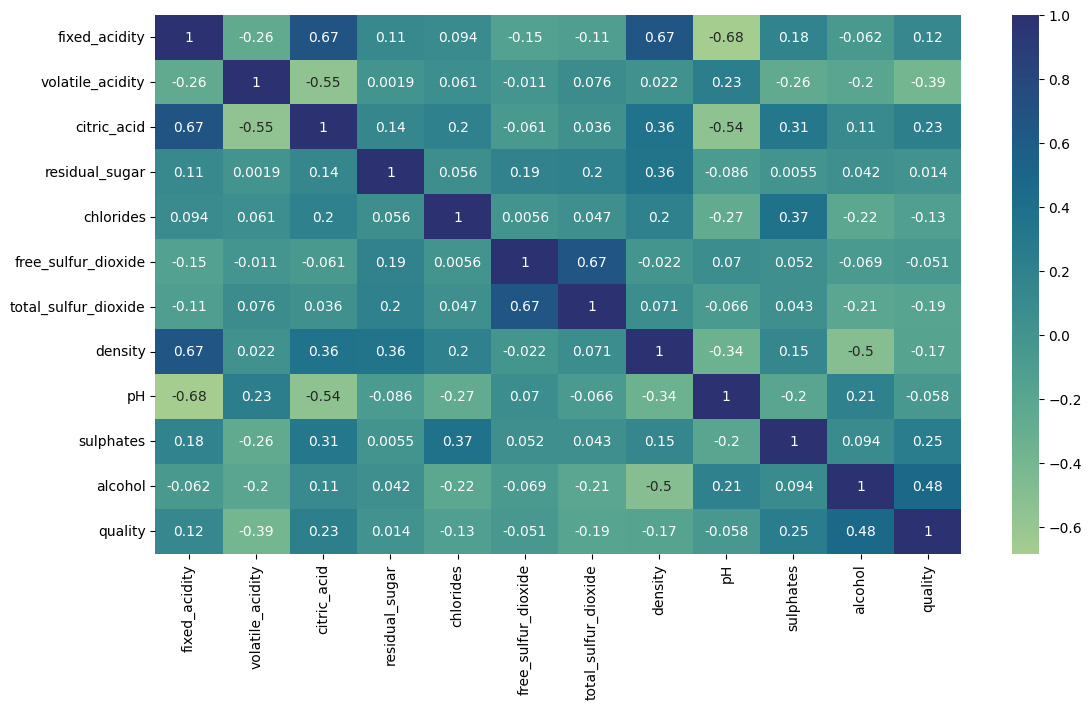

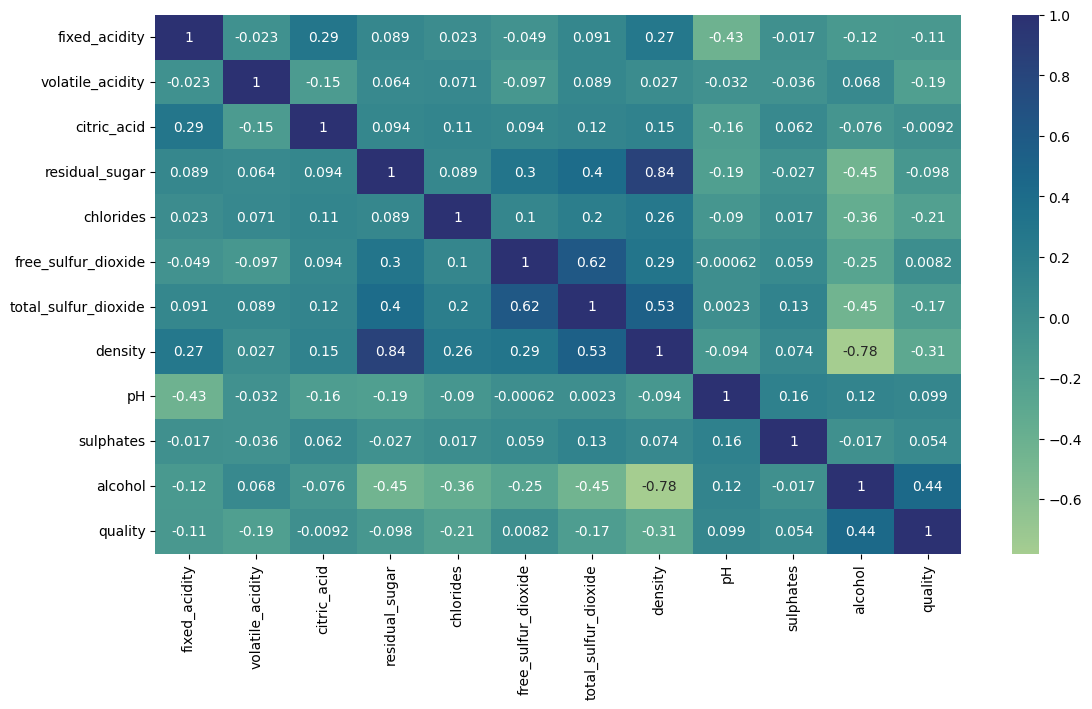

In [10]:
plt.figure(figsize=(13,7))

sns.heatmap(df_red.corr(), cmap = "crest", annot = True)
plt.show()


plt.figure(figsize=(13,7))
sns.heatmap(df_white.corr(), cmap ="crest", annot = True)
plt.show()

We can definetely better visualize our correlations after looking at heatmaps. It is also interesting to see that the wine wine appears to have stronger correlations in general. When we make a larger model and add the numbers in, it does help to interpret the information. 

White wine has the highest correlation at residual sugar and density with a value of 0.84, whereas the red has the highest correlation value at 0.67 with fixed acidity, citric acid, and density. 

Next, we will the differences in our correlation threshold, since we are dealing with a lot of negative terms in the white wine dataset, to be over 0.03. 

<AxesSubplot: >

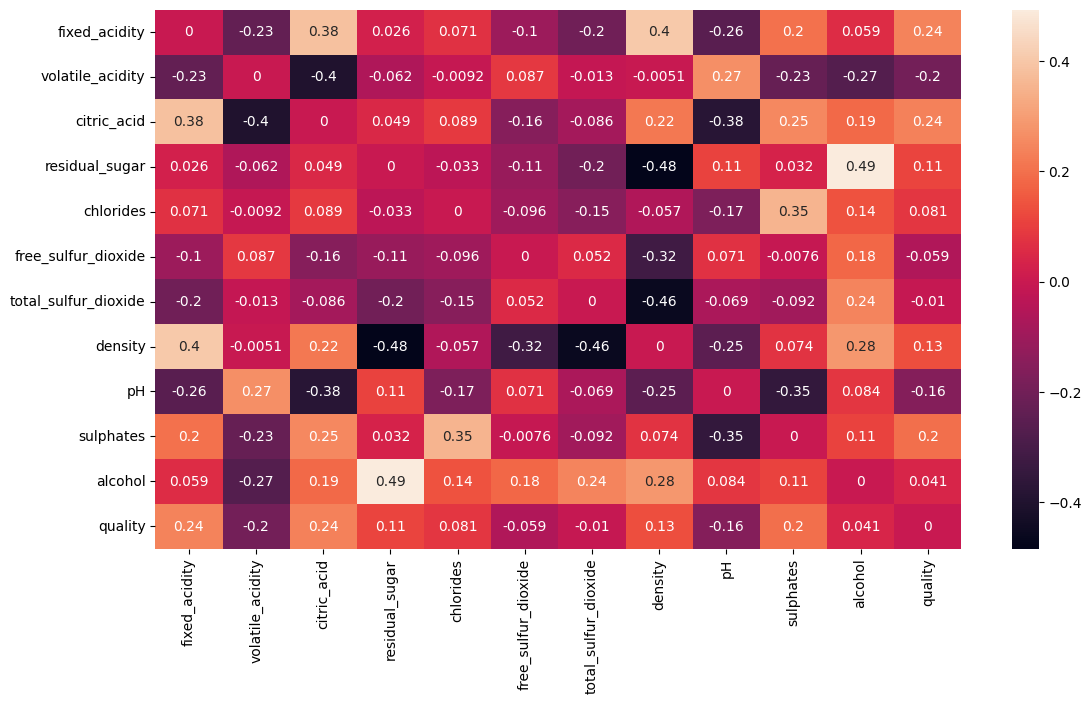

In [11]:
corr_diff = df_red.corr() - df_white.corr()

plt.figure(figsize=(13,7))
sns.heatmap(corr_diff, annot = True)

This is an even better way to compare red and white wine datasets based on their correlations.

We will now run linear regression training models on the red and white data sets. 

In [12]:
red_train, red_test = train_test_split(df_red, test_size = 0.2)

In [13]:
results_red = smf.ols('quality ~ free_sulfur_dioxide + residual_sugar + fixed_acidity + volatile_acidity + alcohol + sulphates + pH + density', data=df_red).fit()
print(results_red.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     103.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.29e-138
Time:                        22:38:01   Log-Likelihood:                -1592.8
No. Observations:                1599   AIC:                             3204.
Df Residuals:                    1590   BIC:                             3252.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              38.7744    

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

y_red = red_train["quality"]
cols_red = ["total_sulfur_dioxide","free_sulfur_dioxide","residual_sugar","fixed_acidity","volatile_acidity","alcohol","sulphates","pH","density"]

X_red=red_train[cols_red]


In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_red,y_red)

LinearRegression()

In [16]:
ytrain_predw = regr.predict(X_red)
print("MSE:%.2f"%mean_squared_error(y_red, ytrain_predw))

MSE:0.42


In [17]:
ytestred = red_test["quality"]
Xtestred = red_test[cols_red]
ypredred = regr.predict(Xtestred)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestred, ypredred))

Out-of-sample Mean squared error: 0.46
